In [ ]:
from google.colab import drive
drive.mount('/content/gdrive', force_remount = True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import itertools

In [ ]:
context = open("/content/gdrive/MyDrive/Data_Science/Project-Mat-biec/Data/Mat-Biec.txt", "r").read()
tudien = open("/content/gdrive/MyDrive/Data_Science/Project-Mat-biec/Data/VDic_uni.txt", "r").read()
#What if we remove stopword? Vietnamese stopword is colecting from 
# https://github.com/stopwords/vietnamese-stopwords/blob/master/vietnamese-stopwords.txt
stop_word= pd.read_table("/content/gdrive/MyDrive/Data_Science/Project-Mat-biec/Data/vietnamese-stopwords.txt", on_bad_lines='warn', header=None)
print(context[:1000])

            Mục lục

Chương 1
Chương 2
Chương 3
Chương 4
Chương 5
Chương 6
Chương 7
Chương 8
Chương 9
Chương 10
                           MẮT BIẾC
                              Nguyễn Nhật Ánh
                             www.dtv-ebook.com

                                  Chương 1

    Hồi còn nhỏ, nhỏ xíu, tôi không có bạn gái. Suốt ngày tôi chỉ chơi với...
mẹ tôi và bà nội tôi. Mẹ tôi rất thương tôi nhưng vì mẹ sợ ba nên ít khi mẹ
che chở được tôi trước những trận đòn của ba tôi. Bà tôi thì lại khác. Bà sinh
ra ba nên ba phải sợ bà. Điều đó thật may mắn đối với tôi.

    Hồi nhỏ tôi rất nghịch, ăn đòn khá thường xuyên. Điều đó buộc đầu óc
non nớt của tôi phải tìm cách đối phó với những trận đòn trừng phạt của ba
tôi. Mỗi lần phạm lỗi, hễ thấy ba tôi dợm rút cây roi mây ra khỏi vách là tôi
vội vàng chạy qua nhà bà tôi. Bà tôi thường nằm trên cái sập gỗ lim đen
bóng, bên dưới là những ngăn kéo đựng thuốc bắc của ông tôi. Bà nằm đó,
miệng bỏm bẻm nhai trầu, tay phe phẩy chiếc quạt 

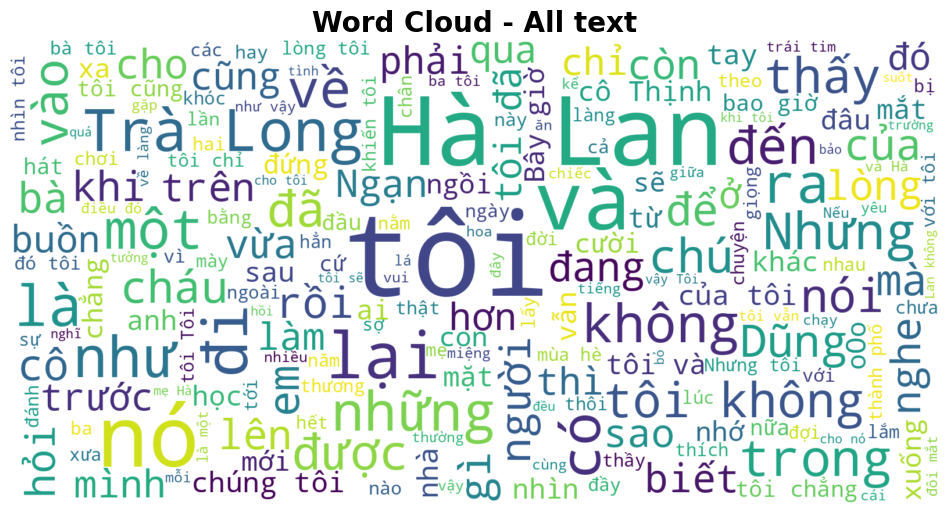

------


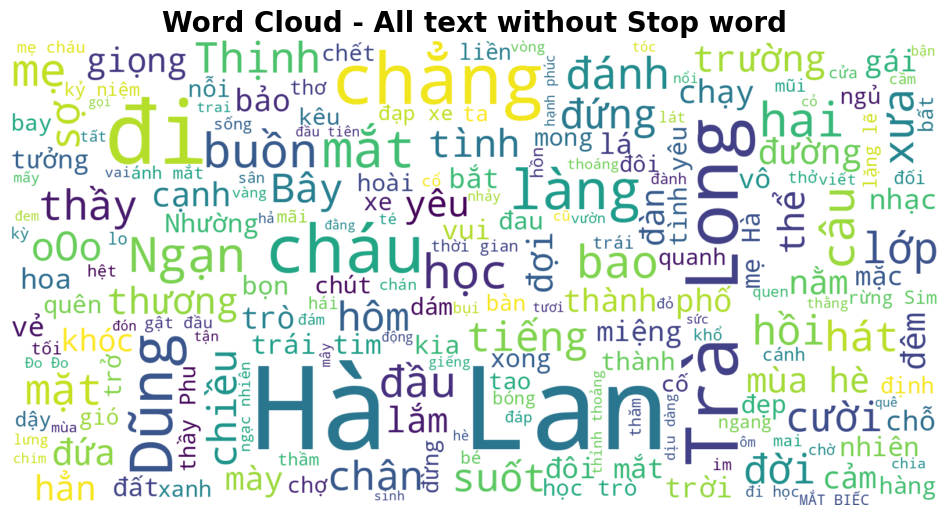

In [ ]:
wordcloud = WordCloud(background_color='white', width=1600, height=800,max_font_size=200).generate(str(context))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - All text',fontsize=20,fontweight='bold')
plt.show();
# Recreate word cloud without stopwords
stop_word = stop_word[0].tolist()
print('------')
##
wordcloud = WordCloud(background_color='white', width=1600, height=800,max_font_size=200, stopwords= stop_word).generate(str(context))
plt.figure(figsize=(12,10))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title('Word Cloud - All text without Stop word',fontsize=20,fontweight='bold')
plt.show();

In [ ]:
# See context
context

'\x0c            Mục lục\n\nChương 1\nChương 2\nChương 3\nChương 4\nChương 5\nChương 6\nChương 7\nChương 8\nChương 9\nChương 10\n\x0c                           MẮT BIẾC\n                              Nguyễn Nhật Ánh\n                             www.dtv-ebook.com\n\n                                  Chương 1\n\n    Hồi còn nhỏ, nhỏ xíu, tôi không có bạn gái. Suốt ngày tôi chỉ chơi với...\nmẹ tôi và bà nội tôi. Mẹ tôi rất thương tôi nhưng vì mẹ sợ ba nên ít khi mẹ\nche chở được tôi trước những trận đòn của ba tôi. Bà tôi thì lại khác. Bà sinh\nra ba nên ba phải sợ bà. Điều đó thật may mắn đối với tôi.\n\n    Hồi nhỏ tôi rất nghịch, ăn đòn khá thường xuyên. Điều đó buộc đầu óc\nnon nớt của tôi phải tìm cách đối phó với những trận đòn trừng phạt của ba\ntôi. Mỗi lần phạm lỗi, hễ thấy ba tôi dợm rút cây roi mây ra khỏi vách là tôi\nvội vàng chạy qua nhà bà tôi. Bà tôi thường nằm trên cái sập gỗ lim đen\nbóng, bên dưới là những ngăn kéo đựng thuốc bắc của ông tôi. Bà nằm đó,\nmiệng bỏm bẻm 

We do need to clean it up the text file, remove \n, extra space bar. Remove special character \x0c. Replace ... / ! / ? by . and then split the whole text by /./

In [ ]:
text = (
    context
    .replace("\x0c", "")
    .replace("...", ".")
    .replace("!", ".")
    .replace("?", ".")
    .replace("\n", " ")
    .replace(";", "")
    .replace(":", "")
    .replace(",", "")
    )
text

'            Mục lục  Chương 1 Chương 2 Chương 3 Chương 4 Chương 5 Chương 6 Chương 7 Chương 8 Chương 9 Chương 10                            MẮT BIẾC                               Nguyễn Nhật Ánh                              www.dtv-ebook.com                                    Chương 1      Hồi còn nhỏ nhỏ xíu tôi không có bạn gái. Suốt ngày tôi chỉ chơi với. mẹ tôi và bà nội tôi. Mẹ tôi rất thương tôi nhưng vì mẹ sợ ba nên ít khi mẹ che chở được tôi trước những trận đòn của ba tôi. Bà tôi thì lại khác. Bà sinh ra ba nên ba phải sợ bà. Điều đó thật may mắn đối với tôi.      Hồi nhỏ tôi rất nghịch ăn đòn khá thường xuyên. Điều đó buộc đầu óc non nớt của tôi phải tìm cách đối phó với những trận đòn trừng phạt của ba tôi. Mỗi lần phạm lỗi hễ thấy ba tôi dợm rút cây roi mây ra khỏi vách là tôi vội vàng chạy qua nhà bà tôi. Bà tôi thường nằm trên cái sập gỗ lim đen bóng bên dưới là những ngăn kéo đựng thuốc bắc của ông tôi. Bà nằm đó miệng bỏm bẻm nhai trầu tay phe phẩy chiếc quạt mo cau với

In [ ]:
#Remove extra space bar
text= " ".join(text.split())
# Make the whole context into lower case
text = text.lower().split(".")

In [ ]:
def find(timkiem, text, tudien):
  ##Check with dictionary
  print("Kiểm tra từ điển với cụm từ: ", timkiem)
  if len(re.findall('\\b'+timkiem+'\\b', tudien, flags=re.IGNORECASE))>0:
    print("Từ/cụm từ có nghĩa trong từ điển")
  else:
    print("Từ/cụm từ không được liệt kê trong từ điển")
  #Finding exactly word/word phase in the whole text
  lst_search = []
  for string in text:
    kq= re.findall('\\b'+timkiem+'\\b', string, flags=re.IGNORECASE)
    #kq return 1 if that sentence got a match with searching word
    if len(kq)>0:
      #append the sentence into a newlist
      lst_search.append(string)
  print("Tìm được", len(lst_search), "kết quả. Một số kết quả với cụm từ tìm kiếm: ", timkiem, "\nlà:")
  print(lst_search[:3])
  return lst_search

###
def check_dict(cau):
  #slicing out the sentence to get every word
  check = cau.split()
  i = 1
  tohop_cau = []
  #make a loop that giving a set of words that the maximum length is 4
  while i<5:
    for item in range(len(check)):
      #combine word. 1 word, 2 word, 3 word, 4 word
      temp = " ".join(check[item: item+i])
      tohop_cau.append(temp)
    i += 1
  # remove duplicate word
  tohop_cau = list(set(tohop_cau))#list(dict.fromkeys(tohop_cau))
  kq_cau = []
  for item in tohop_cau:
    if len(re.findall('\\b'+item+'\\b', tudien, flags=re.IGNORECASE))>0:
      kq_cau.append(item)
  return kq_cau

###
def compare_word(timkiem, dictionary):
  for key in dictionary:
    if key != timkiem and timkiem in key:
      if dictionary[timkiem] == dictionary[key]:
        return True
      else:
        return False
###
def mul_appear(timkiem, lst_search):
  loai = []
  #a = 0
  for cau in lst_search:
    # checking every set of word with dictionary, saving out only meaning word
    temp = check_dict(cau)
    # counting how many time each word appear
    word = {x:temp.count(x) for x in temp}
    if compare_word(timkiem, word) == True:
      lst_search.remove(cau)
      loai.append(cau)
    #else:
      #a+=1
  print("Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là: ", len(lst_search))
  if len(loai) != 0:
    print("Số kết quả tìm kiếm đã loại bỏ đi là ", len(loai))
  return lst_search, loai

###
def loaibo(timkiem, lst_search, iter=2):
  loai = []
  for item in range(iter):
    lst_search, luotloai = mul_appear(timkiem, lst_search)
    loai.append(luotloai)
  return lst_search, loai

## Kiểm tra từ "Trà Long"


In [ ]:
timkiem = 'Trà Long'
timkiem = timkiem.lower()
print("The word or word phase that we need to find is: ", timkiem)
lst_search = find(timkiem, text, tudien)

The word or word phase that we need to find is:  trà long
Kiểm tra từ điển với cụm từ:  trà long
Từ/cụm từ không được liệt kê trong từ điển
Tìm được 249 kết quả. Một số kết quả với cụm từ tìm kiếm:  trà long 
là:
[' nó cho biết nó vừa sinh con gái đặt tên là trà long thế thôi ngoài ra chẳng nói thêm chuyện gì khác', ' trà long cháu làm ngọn lửa sưởi ấm lòng mẹ cháu có phải không', ' tôi không đả động gì đến dũng mặc dù tôi rất muốn biết thái độ của dũng trước tin trà long ra đời cũng như dự định của nó về đám cưới ra sao']


## Kiểm tra từ "dịu dàng"

In [ ]:
timkiem = 'dịu dàng'
timkiem = timkiem.lower()
print("The word or word phase that we need to find is: ", timkiem)
lst_search = find(timkiem, text, tudien)

The word or word phase that we need to find is:  dịu dàng
Kiểm tra từ điển với cụm từ:  dịu dàng
Từ/cụm từ có nghĩa trong từ điển
Tìm được 22 kết quả. Một số kết quả với cụm từ tìm kiếm:  dịu dàng 
là:
[' bà tôi dịu dàng trấn an tôi và đưa tay kéo tôi lên sập đặt tôi nằm khuất sau lưng bà phía sát tường', ' tuy vậy mỗi khi bà kể chuyện tôi luôn luôn nằm nghe với cảm giác hứng thú hệt như lần đầu tiên có lẽ do giọng kể dịu dàng và âu yếm của bà bao giờ nó cũng toát ra một tình cảm trìu mến đặc biệt dành cho tôi khiến trái tim tôi run lên trong nỗi xúc động hân hoan khó tả', ' giọng nói dịu dàng của cô thịnh kéo tôi về với thực tại']


In [ ]:
lst_search, loai = loaibo(timkiem, lst_search, iter=4)

Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  22
Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  22
Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  22
Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  22


## Kiểm tra từ "dịu"

In [ ]:
timkiem = 'dịu'
timkiem = timkiem.lower()
print("The word or word phase that we need to find is: ", timkiem)
lst_search = find(timkiem, text, tudien)

The word or word phase that we need to find is:  dịu
Kiểm tra từ điển với cụm từ:  dịu
Từ/cụm từ có nghĩa trong từ điển
Tìm được 28 kết quả. Một số kết quả với cụm từ tìm kiếm:  dịu 
là:
[' bà tôi dịu dàng trấn an tôi và đưa tay kéo tôi lên sập đặt tôi nằm khuất sau lưng bà phía sát tường', ' tuy vậy mỗi khi bà kể chuyện tôi luôn luôn nằm nghe với cảm giác hứng thú hệt như lần đầu tiên có lẽ do giọng kể dịu dàng và âu yếm của bà bao giờ nó cũng toát ra một tình cảm trìu mến đặc biệt dành cho tôi khiến trái tim tôi run lên trong nỗi xúc động hân hoan khó tả', ' giọng nói dịu dàng của cô thịnh kéo tôi về với thực tại']


In [ ]:
lst_search, loai = loaibo(timkiem, lst_search, iter=6)

Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  15
Số kết quả tìm kiếm đã loại bỏ đi là  13
Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  8
Số kết quả tìm kiếm đã loại bỏ đi là  7
Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  4
Số kết quả tìm kiếm đã loại bỏ đi là  4
Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  3
Số kết quả tìm kiếm đã loại bỏ đi là  1
Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  3
Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  3


### Các câu có từ "dịu"

In [ ]:
lst_search

[' đến khi tiếng trống vào học vang lên trận chiến mới tạm lắng dịu để rồi bùng nổ dữ dội hơn vào giờ ra chơi',
 ' tôi vội vàng nhắm mắt cho lòng dịu lại và khẽ thì thầm - hà lan cho tôi xin lỗi',
 ' tôi mong cuộc đời em toàn lá biếc hoa hồng anh biết lấy gì làm dịu nỗi đau trong lòng em ngoài những bài thơ nhỏ đầy nắng và cỏ hoa đêm đêm anh thức viết để mong xua được mùa đông ra khỏi trái tim em cùng với những âu lo và phiền muộn để mai đây trên con đường dài dẫu nhiều trắc trở em chỉ gặp toàn niềm vui và những chàng trai thật thà và tốt bụng yêu em chỉ cần bằng một nửa anh thôi']

### Các câu có các từ ghép "dịu dàng", "xoa dịu", "dịu hiền",... đã loại ra

In [ ]:
loai

[[' bà tôi dịu dàng trấn an tôi và đưa tay kéo tôi lên sập đặt tôi nằm khuất sau lưng bà phía sát tường',
  ' giọng nói dịu dàng của cô thịnh kéo tôi về với thực tại',
  ' dù vậy hà lan không phải là cô bé hoàn toàn dịu dàng',
  ' mặc dù đôi lúc hơi bướng bỉnh hà lan bao giờ cũng là một người bạn gái dịu dàng thậm chí có lúc yếu đuối',
  ' một bên là những trận đánh dai dẳng và đầy thương tích với thằng toản và đồng bọn một bên sự săn sóc êm ái và dịu dàng của hà lan',
  ' tôi không tin ngôi trường dịu dàng mà cô thịnh và hà lan đang theo học lại đầy rẫy nguy hiểm như tụi con trai vẫn hay kể',
  ' bằng đôi cánh dịu dàng và bay bổng nó đã nhấc tôi lên khỏi nỗi mê đắm xanh xao phiền muộn',
  ' tôi khẽ nhắm mắt lại và có cảm giác những ngón tay dịu dàng và mềm mại của hà lan đang mơn man lên trái tim tôi',
  ' cảm giác dịu dàng mà hà lan đem lại không còn lừa phỉnh tôi được nữa',
  ' tôi nhét mấy vỉ thuốc vào tay nó dịu dàng nói - hà lan cứ cầm lấy',
  ' trong thời gian đó tôi cố tỏ ra dị

##Kiểm tra từ "và"

In [ ]:
timkiem = 'và'
timkiem = timkiem.lower()
print("The word or word phase that we need to find is: ", timkiem)
lst_search = find(timkiem, text, tudien)

The word or word phase that we need to find is:  và
Kiểm tra từ điển với cụm từ:  và
Từ/cụm từ có nghĩa trong từ điển
Tìm được 597 kết quả. Một số kết quả với cụm từ tìm kiếm:  và 
là:
[' mẹ tôi và bà nội tôi', ' bà tôi dịu dàng trấn an tôi và đưa tay kéo tôi lên sập đặt tôi nằm khuất sau lưng bà phía sát tường', ' bà tôi thản nhiên đáp và tiếp tục nhai trầu']


In [ ]:
lst_search, loai = loaibo(timkiem, lst_search)

Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  541
Số kết quả tìm kiếm đã loại bỏ đi là  56
Sau khi kiểm tra với từ điển. Ta có số lượng kết quả từ tìm kiếm là:  528
Số kết quả tìm kiếm đã loại bỏ đi là  13


In [ ]:
loai

[[' thú thật lúc đó tôi chẳng hề chú ý mảy may đến những lời răn dạy của ba tôi đầu óc tôi mãi bận bịu vào việc đoán xem lát nữa đây tôi sẽ bị đánh mấy roi và thầm mong bà tôi đang đi chơi đâu đó trong làng sẽ kịp về trước khi xảy ra những chuyện đáng tiếc cho đứa cháu khốn khổ của bà',
  ' sáng sớm thuyền về những người buôn cá ở miệt biển thức dậy từ trước vội vã xếp cá vào giỏ và thuê xe thồ đi suốt ngày không nghỉ để kịp đem cá đến phiên chợ đêm quê tôi',
  ' ấn tượng đó sâu sắc đễn nỗi mãi đến tận bây giờ khi tôi đã bước qua tuổi ba mươi cứ mỗi lần đi ngang qua một quầy tạp hóa bất chợt nào tôi không làm sao kềm chế được ý định dừng chân lại và dán mắt vào tủ kiếng với một nỗi xao xuyến lạ lùng',
  ' họ gồng người lên và để cho những thanh mã tấu chém vào',
  ' ba lẳng lặng trên giường vờ đọc sách không dám cãi lại nửa câu mặc cho bà tôi bế tôi lê và nhẹ nhàng đặt tôi vào giường trong khi tôi đã ngoẻo cổ ngủ trên tay bà tự bao giờ',
  ' nó tước đoạt thẳng tay những viên bi mù u nh

Fix bug

In [ ]:
# cho 1 câu, tách từng chữ ra
caucu = "và hồn tôi từ đó là khúc ca vang và trong ngần tù và"
check = caucu.split()
word1 = {x:check.count(x) for x in check}
word1

{'và': 3,
 'hồn': 1,
 'tôi': 1,
 'từ': 1,
 'đó': 1,
 'là': 1,
 'khúc': 1,
 'ca': 1,
 'vang': 1,
 'trong': 1,
 'ngần': 1,
 'tù': 1}

In [ ]:
#tạo các tổ hợp từ, từ 1 từ tới 4 từ
i = 1
tohop_cau = []
#make a loop that giving a set of words that the maximum length is 4
while i<5:
  for item in range(len(check)):
    #combine word. 1 word, 2 word, 3 word, 4 word
    temp = " ".join(check[item: item+i])
    tohop_cau.append(temp)
  i += 1

In [ ]:
tohop_cau2 = list(set(tohop_cau))

In [ ]:
kq_cau = []
for item in tohop_cau2:
  if len(re.findall('\\b'+item+'\\b', tudien, flags=re.IGNORECASE))>0:
    kq_cau.append(item)

In [ ]:
word2 = {x:kq_cau.count(x) for x in kq_cau}
word2

{'tôi': 1,
 'tù và': 1,
 'là': 1,
 'hồn': 1,
 'trong': 1,
 'tù': 1,
 'đó': 1,
 'ca': 1,
 'ngần': 1,
 'khúc': 1,
 'từ': 1,
 'và': 1,
 'vang': 1}

In [ ]:
gia_tri = [key for key, value in word1.items() if value > 1]
print(gia_tri)


['và']
